In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [7]:
start = '2010-01-01'
end='2022-11-11'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415358
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-13,28.892500,28.067499,28.799999,28.084999,183249600.0,25.711300
2015-11-16,28.559999,27.750000,27.844999,28.545000,152426800.0,26.132423
2015-11-17,28.762501,28.330000,28.730000,28.422501,110467600.0,26.020279
2015-11-18,29.372499,28.875000,28.940001,29.322500,186698800.0,26.844208
2015-11-19,29.937500,29.190001,29.410000,29.695000,173183200.0,27.185228


In [9]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415358
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [10]:
df=df.drop(['Date','Adj Close'],axis =1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


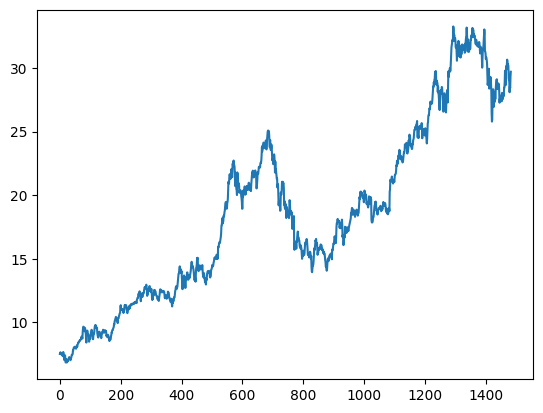

In [11]:
plt.plot(df.Close)

In [12]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
1478,28.892500,28.067499,28.799999,28.084999,183249600.0
1479,28.559999,27.750000,27.844999,28.545000,152426800.0
1480,28.762501,28.330000,28.730000,28.422501,110467600.0
1481,29.372499,28.875000,28.940001,29.322500,186698800.0


In [15]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1478    29.236975
1479    29.203675
1480    29.171025
1481    29.152925
1482    29.136300
Name: Close, Length: 1483, dtype: float64

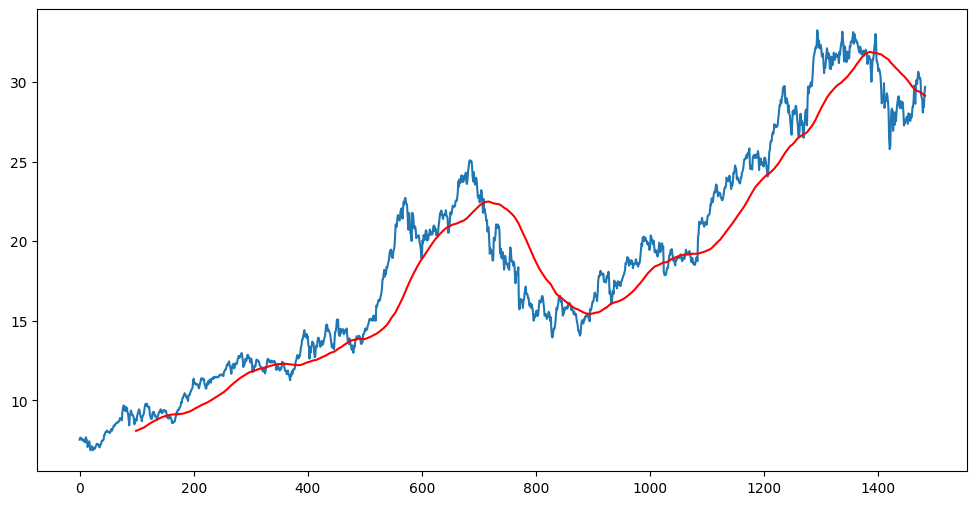

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [17]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1478    30.506562
1479    30.501000
1480    30.494800
1481    30.491962
1482    30.490512
Name: Close, Length: 1483, dtype: float64

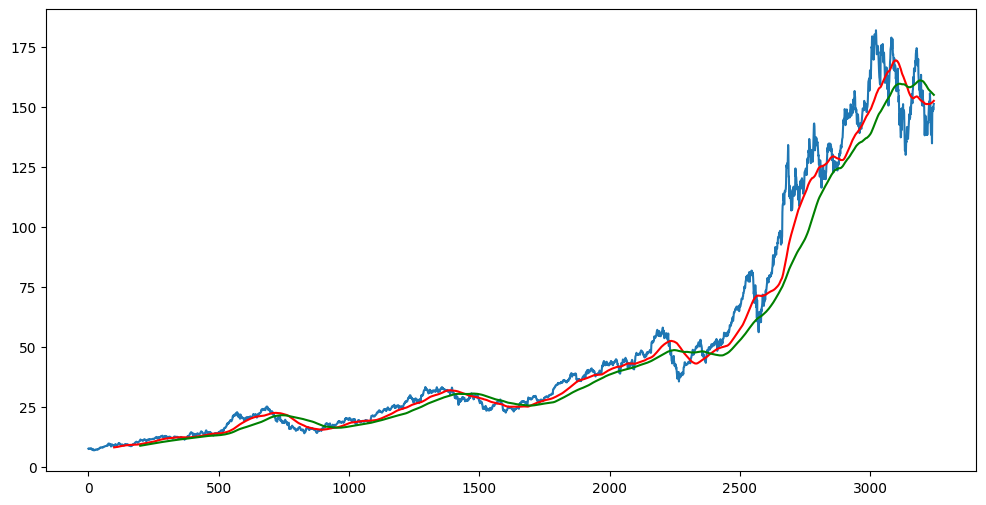

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
df.shape


(1483, 5)

In [19]:
#spliting training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1038, 1)
(445, 1)


In [20]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
data_testing.head()

,Close
1038,19.499643
1039,19.191786
1040,18.969643
1041,18.758928
1042,18.841070


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03662381],
       [0.04305457],
       [0.04378   ],
       ...,
       [0.67418873],
       [0.69087347],
       [0.69001068]])

In [24]:
data_training_array.shape

(1038, 1)

In [25]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    X_train,Y_train=np.array(x_train),np.array(y_train)
    
   
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [39]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences= True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences= True ))
model.add(Dropout(0.3))

model=Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences= True))
model.add(Dropout(0.4))

model=Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [40]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
30/30 [==============================] - 18s 338ms/step - loss: 0.0593
Epoch 2/50
30/30 [==============================] - 13s 436ms/step - loss: 0.0119
Epoch 3/50
30/30 [==============================] - 16s 532ms/step - loss: 0.0104
Epoch 4/50
30/30 [==============================] - 12s 397ms/step - loss: 0.0088
Epoch 5/50
30/30 [==============================] - 11s 361ms/step - loss: 0.0100
Epoch 6/50
30/30 [==============================] - 12s 408ms/step - loss: 0.0091
Epoch 7/50
30/30 [==============================] - 8s 281ms/step - loss: 0.0087
Epoch 8/50
30/30 [==============================] - 9s 294ms/step - loss: 0.0080
Epoch 9/50
30/30 [==============================] - 10s 325ms/step - loss: 0.0072
Epoch 10/50
30/30 [==============================] - 16s 523ms/step - loss: 0.0081
Epoch 11/50
30/30 [==============================] - 10s 318ms/step - loss: 0.0068
Epoch 12/50
30/30 [==============================] - 8s 278ms/step - loss: 0.0074
Epoch 13/50
30/3

model.save('keras_model.h5')

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
1038,19.499643
1039,19.191786
1040,18.969643
1041,18.758928
1042,18.841070


In [43]:
past_100_days=data_training.tail(100)

In [44]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_3716\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [45]:
final_df.head()

,Close
0,17.467857
1,17.197500
2,17.365000
3,17.241072
4,17.026787


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02718762],
       [0.01052279],
       [0.02084747],
       [0.01320854],
       [0.        ],
       [0.02467799],
       [0.02820024],
       [0.01466146],
       [0.01382495],
       [0.02421571],
       [0.009224  ],
       [0.02166199],
       [0.02837636],
       [0.03535491],
       [0.04246549],
       [0.04827728],
       [0.0536268 ],
       [0.06108961],
       [0.07075391],
       [0.09820582],
       [0.09492565],
       [0.10613092],
       [0.1214309 ],
       [0.1083324 ],
       [0.11696198],
       [0.08790301],
       [0.10599889],
       [0.10115563],
       [0.09527788],
       [0.11007149],
       [0.10720962],
       [0.09723717],
       [0.07867901],
       [0.09644464],
       [0.09312049],
       [0.09523391],
       [0.09659877],
       [0.11317555],
       [0.106197  ],
       [0.09219581],
       [0.09422117],
       [0.08420464],
       [0.09772144],
       [0.09477151],
       [0.10344517],
       [0.12471096],
       [0.15236098],
       [0.174

In [47]:
input_data.shape

(545, 1)

In [48]:
x_test=[]
y_test=[]


for i in range(100,data_training_array.shape[0]):
    x_test.append(data_training_array[i-100:i])
    y_test.append(data_training_array[i,0])


In [49]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(938, 100, 1)
(938,)


In [50]:
y_predicted=model.predict(x_test)

30/30 [==============================] - 4s 112ms/step


In [51]:
y_predicted.shape



(938, 1)

In [54]:
x_test

array([[[0.03662381],
        [0.04305457],
        [0.04378   ],
        ...,
        [0.09855897],
        [0.10726393],
        [0.10424466]],

       [[0.04305457],
        [0.04378   ],
        [0.03709439],
        ...,
        [0.10726393],
        [0.10424466],
        [0.10206838]],

       [[0.04378   ],
        [0.03709439],
        [0.03632971],
        ...,
        [0.10424466],
        [0.10206838],
        [0.12018424]],

       ...,

       [[0.54945589],
        [0.53986861],
        [0.58541319],
        ...,
        [0.64234872],
        [0.66060186],
        [0.67426726]],

       [[0.53986861],
        [0.58541319],
        [0.58239386],
        ...,
        [0.66060186],
        [0.67426726],
        [0.67418873]],

       [[0.58541319],
        [0.58239386],
        [0.56755218],
        ...,
        [0.67426726],
        [0.67418873],
        [0.69087347]]])

In [52]:
y_predicted

array([[0.138463  ],
       [0.13692117],
       [0.13635811],
       [0.13642989],
       [0.13738097],
       [0.13911226],
       [0.14077212],
       [0.14103752],
       [0.14048494],
       [0.13972624],
       [0.13835624],
       [0.13780826],
       [0.13770989],
       [0.13777086],
       [0.13885045],
       [0.14151612],
       [0.14514512],
       [0.14918551],
       [0.15230116],
       [0.15605776],
       [0.15900491],
       [0.16129184],
       [0.16283856],
       [0.16447024],
       [0.16355836],
       [0.16179068],
       [0.15965062],
       [0.15738323],
       [0.15528965],
       [0.15427253],
       [0.15323243],
       [0.15247826],
       [0.1514684 ],
       [0.14986795],
       [0.14843701],
       [0.14695476],
       [0.14540835],
       [0.14355718],
       [0.14237787],
       [0.14154583],
       [0.14157005],
       [0.14189962],
       [0.14222962],
       [0.14362022],
       [0.14443654],
       [0.14470263],
       [0.144821  ],
       [0.145

In [53]:
y_test

array([0.10206838, 0.12018424, 0.12710516, 0.13484949, 0.14096658,
       0.13933927, 0.12530143, 0.11545924, 0.11230269, 0.10028422,
       0.11461619, 0.120498  , 0.12200761, 0.13261442, 0.14743652,
       0.15649446, 0.1608077 , 0.15316142, 0.16037641, 0.15472988,
       0.15086756, 0.14635815, 0.14949511, 0.12571314, 0.11661599,
       0.11063618, 0.1076169 , 0.1109303 , 0.13061457, 0.12947745,
       0.1324772 , 0.127909  , 0.11714534, 0.11896865, 0.11645914,
       0.11342023, 0.10495044, 0.11732177, 0.12192919, 0.13130082,
       0.13310455, 0.13181059, 0.14122143, 0.13510435, 0.12951667,
       0.12783057, 0.13684929, 0.13700614, 0.13906479, 0.13655522,
       0.13339868, 0.13665323, 0.13206544, 0.11398879, 0.11712576,
       0.11185177, 0.1089893 , 0.11747867, 0.11963527, 0.11338102,
       0.11291046, 0.10538178, 0.09387312, 0.09967645, 0.09455932,
       0.09718652, 0.09891183, 0.10008821, 0.11426328, 0.11787075,
       0.13081069, 0.12892853, 0.13894715, 0.13924122, 0.13990

In [ ]:
scaler.scale_

In [61]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

array([ 3.35559493,  3.95117126,  4.178703  , ..., 40.19431901,
       40.52820526, 40.30260812])

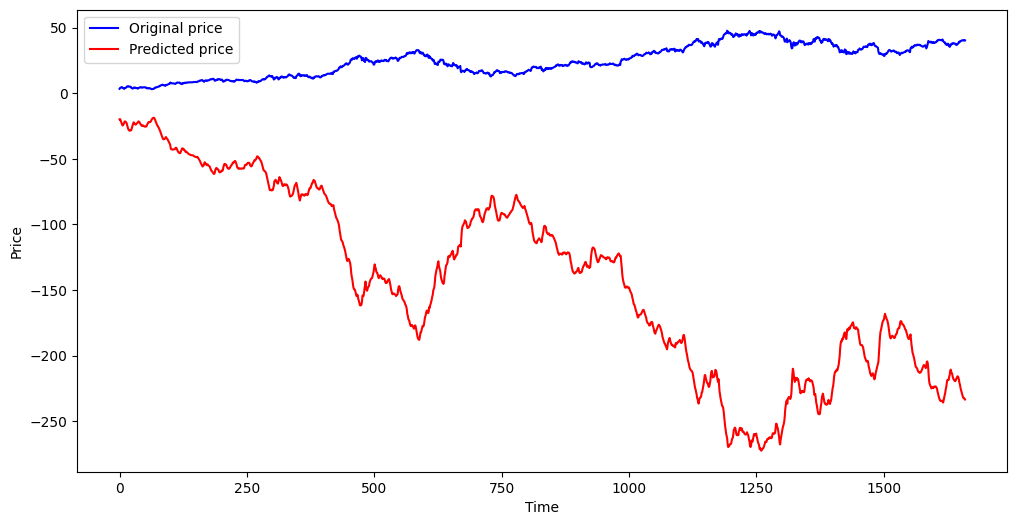

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original price')
plt.plot(y_predicted,'r',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()